# Task 2: Drug Classification

1. Download the Drug dataset on Moodle. This dataset, in csv format, contains features that are numerical, categorical and ordinal as well as one of 5 classes to predict: DrugA, DrugB, DrugC, DrugX, or DrugY.

In [1]:
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
from sklearn.datasets import load_files
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score, f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
import sklearn

2. Load the dataset in Python (you can use pandas.read csv).

In [2]:
df = pd.read_csv('drug200.csv')

3. Plot the distribution of the instances in each class and store the graphic in a file called drug-distribution.pdf. You can use matplotlib.pyplot. This pre-analysis will allow you to determine if the classes are balanced, and which metric is more appropriate to use to evaluate the performance of your classifier.

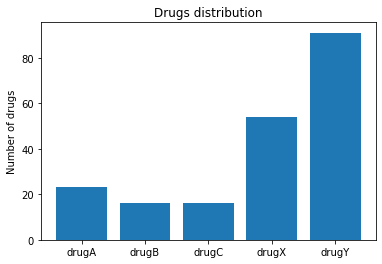

In [4]:
drugs = sorted(df['Drug'].unique())
drugA = df[df['Drug'] == 'drugA']
drugB = df[df['Drug'] == 'drugB']
drugC = df[df['Drug'] == 'drugC']
drugX = df[df['Drug'] == 'drugX']
drugY = df[df['Drug'] == 'drugY']

plt.bar(drugs, [len(drugA), len(drugB), len(drugC), len(drugX), len(drugY)])
plt.ylabel('Number of drugs')
plt.title('Drugs distribution')
plt.savefig('drug-distribution.pdf')
plt.show()

"""
Strong data imbalance towards drugX and drugY
""";

4. Convert all ordinal and nominal features in numerical format. Make sure that your converted format respects the ordering of ordinal features, and does not introduce any ordering for nominal features. You may want to take a look at pandas.get dummies and pandas.Categorical to do this.

In [5]:
# Change nominal features to numerical features
parsed_df = pd.get_dummies(df, prefix=['Sex'], columns=['Sex']).rename(columns={'Sex_F': 'Female', 'Sex_M': 'Male'})
# Change ordinal features to numerical features [0, 1, 2, etc] 
parsed_df['BP'] = pd.Categorical(parsed_df['BP'], ordered=True, categories=['LOW', 'NORMAL', 'HIGH']).codes
parsed_df['Cholesterol'] = pd.Categorical(parsed_df['Cholesterol'], ordered=True, categories=['NORMAL', 'HIGH']).codes
parsed_df

,Age,BP,Cholesterol,Na_to_K,Drug,Female,Male
0,23,2,1,25.355,drugY,1,0
1,47,0,1,13.093,drugC,0,1
2,47,0,1,10.114,drugC,0,1
3,28,1,1,7.798,drugX,1,0
4,61,0,1,18.043,drugY,1,0
...,...,...,...,...,...,...,...
195,56,0,1,11.567,drugC,1,0
196,16,0,1,12.006,drugC,0,1
197,52,1,1,9.894,drugX,0,1
198,23,1,0,14.020,drugX,0,1


5. Split the dataset using train test split using the default parameter values.

In [6]:
arr_no_drug = parsed_df.drop('Drug', axis=1).to_numpy() # X
arr_drug = parsed_df['Drug'].to_numpy() # y
x_train, x_test, y_train, y_test = train_test_split(arr_no_drug, arr_drug) # default split, testing = 0.25

6. Run 6 different classifiers:

In [7]:
def print_confusion_metrics(target, output):
    confusion_m = confusion_matrix(target, output)

    plt.matshow(confusion_m, cmap=plt.cm.OrRd)
    plt.colorbar(fraction=0.045)
    tick_marks = np.arange(len(confusion_m))
    plt.xticks(tick_marks, drugs, rotation=45)
    plt.yticks(tick_marks, drugs)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    for i, j in itertools.product(range(confusion_m.shape[0]), range(confusion_m.shape[1])):
            plt.text(j, i, "{:,}".format(confusion_m[i][j]), horizontalalignment="center")


(a) NB: a Gaussian Naive Bayes Classifier (naive bayes.GaussianNB) with the default parameters.

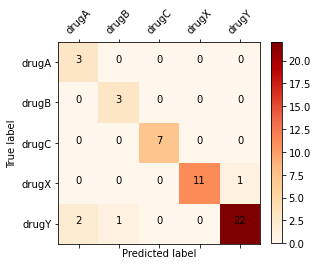

In [8]:
def gaussian_naive_bayes_classifier():
    clf = GaussianNB().fit(x_train, y_train)
    return clf

prediction = gaussian_naive_bayes_classifier().predict(x_test)
print_confusion_metrics(y_test, prediction)

(b) Base-DT: a Decision Tree (tree.DecisionTreeClassifier) with the default parameters.

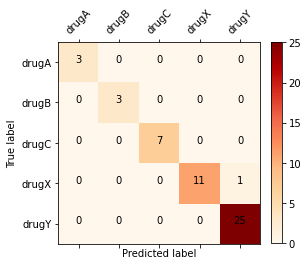

In [9]:
def decision_tree_classifier():
    clf = DecisionTreeClassifier().fit(x_train, y_train)
    return clf

prediction = decision_tree_classifier().predict(x_test)
print_confusion_metrics(y_test, prediction)

(c) Top-DT: a better performing Decision Tree found using (GridSearchCV). The gridsearch will allow you to find the best combination of hyper-parameters, as determined by the evaluation function that you have determined in step (3) above. The hyper-parameters that you will experiment with are:
- criterion: gini or entropy
- max depth : 2 different values of your choice
- min samples split: 3 different values of your choice

{'criterion': 'gini', 'max_depth': 69, 'min_samples_split': 2}

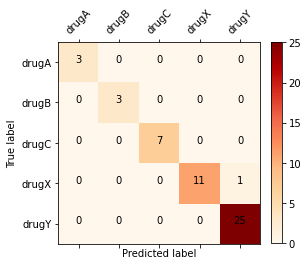

In [12]:
def top_decision_tree_classifier():
    parameters = {
        'criterion': ['gini', 'entropy'],
        'max_depth': [69, 420],
        'min_samples_split': [2, 5, 12]
    }
    clf = GridSearchCV(DecisionTreeClassifier(), parameters).fit(x_train, y_train)
    return clf

prediction = top_decision_tree_classifier().predict(x_test)
print_confusion_metrics(y_test, prediction)

top_decision_tree_classifier().best_params_

(d) PER: a Perceptron (linear model.Perceptron), with default parameter values.

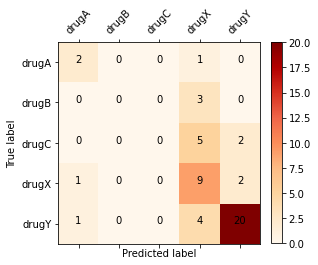

In [14]:
def perceptron_classifier():
    clf = Perceptron().fit(x_train, y_train)
    return clf

prediction = perceptron_classifier().predict(x_test)
print_confusion_metrics(y_test, prediction)

"""
Bad results because data imbalance, and only update weights on mistakes 
""";

(e) Base-MLP: a Multi-Layered Perceptron (neural network.MLPClassifier) with 1 hidden layer of
100 neurons, sigmoid/logistic as activation function, stochastic gradient descent, and default values
for the rest of the parameters.

C:\Users\Sebastien\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


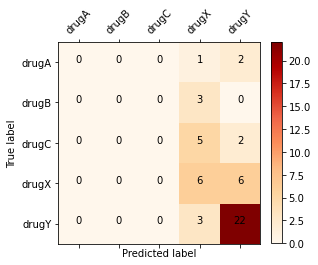

In [20]:
def multi_layered_perceptron_classifier():
    clf = MLPClassifier(hidden_layer_sizes=(100,), activation='logistic', solver='sgd' ).fit(x_train, y_train)
    return clf

prediction = multi_layered_perceptron_classifier().predict(x_test)
print_confusion_metrics(y_test, prediction)

(f) Top-MLP: a better performing Multi-Layered Perceptron found using grid search. For this, you need
to experiment with the following parameter values:
- activation function: sigmoid, tanh, relu and identity
- 2 network architectures of your choice: for eg 2 hidden layers with 30 + 50 nodes, 3 hidden layers with 10 + 10 + 10
- solver: Adam and stochastic gradient descent

C:\Users\Sebastien\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Sebastien\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Sebastien\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Sebastien\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Sebastien\miniconda3\lib\site-packages\skle

C:\Users\Sebastien\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Sebastien\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Sebastien\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Sebastien\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Sebastien\miniconda3\lib\site-packages\skle

C:\Users\Sebastien\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Sebastien\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Sebastien\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Sebastien\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Sebastien\miniconda3\lib\site-packages\skle

C:\Users\Sebastien\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Sebastien\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Sebastien\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Sebastien\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Sebastien\miniconda3\lib\site-packages\skle

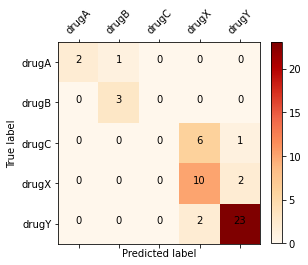

In [21]:
def top_multi_layered_perceptron_classifier():
    parameters = {
        'activation': ['logistic', 'tanh', 'relu', 'identity'],
        'hidden_layer_sizes': [(30, 50), (10, 10, 10)],
        'solver': ['adam', 'sgd']
    }
    clf = GridSearchCV(MLPClassifier(), parameters).fit(x_train, y_train)
    return clf

prediction = top_multi_layered_perceptron_classifier().predict(x_test)
print_confusion_metrics(y_test, prediction)

top_multi_layered_perceptron_classifier().best_params_

"""
More layer helps with generalization
""";

7. For each of the 6 classifier above, append the following information in a file called drugs-performance.txt: (to make it easier for the TAs, make sure that your output for each sub-question below is clearly marked in your output file, using the headings (a), (b) . . .) 

(a) a clear separator (a sequence of hyphens or stars) and a string clearly describing the model (e.g. the model name + hyper-parameter values that you changed). In the case of Top-DT and Top-MLP, display the best hyperparameters found by the gridsearch.

(b) the confusion matrix

(c) the precision, recall, and F1-measure for each class

(d) the accuracy, macro-average F1 and weighted-average F1 of the model

In [22]:
with open("drug-performance.txt", "w") as myfile:
    myfile.write('')

# separator and model name

def a(txt):
    with open("drug-performance.txt", "a") as myfile:
        myfile.write("------------------------------------------------------------------")    
        myfile.write("\n\n")    
        myfile.write(txt)
        myfile.write("\n")
        myfile.write("\n")
        
# confusion matrix

def b(model):
    y_pred = model.predict(x_test)
    confusion_m = confusion_matrix(y_test, y_pred)

    with open("drug-performance.txt", "a") as myfile:
        myfile.write('1. Confusion matrix')
        myfile.write("\n\n")
        myfile.write(str(confusion_m))
        myfile.write("\n")
        myfile.write("\n")
    
    return y_pred

# precision, recall and F-1 measure for each class

def c(y_pred):
    with open("drug-performance.txt", "a") as myfile:
        myfile.write('2. precision, recall, and F1-measure for each class')
        myfile.write('\n\n')
        myfile.write(classification_report(y_test, y_pred, target_names=drugs, zero_division=0))
        myfile.write("\n")

# accuracy, macro-average F1 and weighted-average F1 of the model

def d(y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    macro_avg_f1 = f1_score(y_test, y_pred, average='macro')
    weighted_avg_f1 = f1_score(y_test, y_pred, average='macro')

    with open("drug-performance.txt", "a") as myfile:
        myfile.write('3. accuracy, macro-average F1 and weighted-average F1 of the model')
        myfile.write('\n\n')
        myfile.write('Accuracy: {}'.format(accuracy))
        myfile.write("\n")
        myfile.write('Macro-average: {}'.format(macro_avg_f1))
        myfile.write("\n")
        myfile.write('Weighted-average: {}'.format(weighted_avg_f1))
        myfile.write("\n")
        myfile.write("\n")

In [23]:
models = [
    gaussian_naive_bayes_classifier,
    decision_tree_classifier,
    top_decision_tree_classifier,
    perceptron_classifier,
    multi_layered_perceptron_classifier,
    top_multi_layered_perceptron_classifier
]

parameters = {
    'gaussian_naive_bayes_classifier' : ['default'],
    'decision_tree_classifier' : ['default'],
    'top_decision_tree_classifier' : [
        'criterion: gini',
        'max depth : 69',
        'min samples split: 2'
    ],
    'perceptron_classifier' : ['default'],
    'multi_layered_perceptron_classifier' : [
        '1 hidden layer of 100 neurons',
        'sigmoid/logistic as activation function', 
        'stochastic gradient descent',
        'default values for the rest of the parameters'
    ],
    'top_multi_layered_perceptron_classifier' : [
        'activation function: tanh',
        'Network architectures: 2 hidden layers with 30 + 50 nodes',
        'solver: Adam'
    ]
}

for model in models:
    title = model.__name__.replace('_', ' ').capitalize() + ' with parameters:'
    for param in parameters[model.__name__]:
        title += '\n\t- ' + param

    a(title)
    y_pred = b(model())
    c(y_pred)
    d(y_pred)

C:\Users\Sebastien\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Sebastien\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Sebastien\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Sebastien\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Sebastien\miniconda3\lib\site-packages\skle

C:\Users\Sebastien\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Sebastien\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Sebastien\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Sebastien\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Sebastien\miniconda3\lib\site-packages\skle

C:\Users\Sebastien\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Sebastien\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


8. Redo steps 6, 10 times for each model and append the average accuracy, average macro-average F1, average weighted-average F1 as well as the standard deviation for the accuracy, the standard deviation of the macro-average F1, and the standard deviation of the weighted-average F1 at the end of the file drugs-performance.txt. Does the same model give you the same performance every time? Explain in a plain text file called drugs-discussion.txt. A 1 or 2 paragraph discussion is expected.

In [24]:
with open('drug-performance.txt', 'a') as f:
    f.write('\n\n\n*****************************************************\n')
    f.write('************           Step #8      *****************\n')
    f.write('*****************************************************\n')
    
    for model in models:
        f.write('\n**** %s ****\n' % model.__name__.replace('_', ' ').capitalize())
        accuracy = []
        macro_average_f1 = []
        weighted_average_f1 = []

        for i in range(10):
            prediction = model().predict(x_test)
            accuracy.append(accuracy_score(y_test, prediction))
            macro_average_f1.append(f1_score(y_test, prediction, average='macro'))
            weighted_average_f1.append(f1_score(y_test, prediction, average='weighted'))

        f.write('Average accuracy: %.6f\n' % (np.average(accuracy)))
        f.write('Average macro-average f1: %.6f\n' % (np.average(macro_average_f1)))
        f.write('Average weighted-average f1: %.6f\n' % (np.average(weighted_average_f1)))

        f.write('Standard deviation accuracy: %.6f\n' % (np.std(accuracy)))
        f.write('Standard deviation macro-average f1: %.6f\n' % (np.std(macro_average_f1)))
        f.write('Standard deviation weighted-average f1: %.6f\n' % (np.std(weighted_average_f1)))  


C:\Users\Sebastien\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Sebastien\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Sebastien\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Sebastien\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Sebastien\miniconda3\lib\site-packages\skle

C:\Users\Sebastien\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Sebastien\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Sebastien\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Sebastien\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Sebastien\miniconda3\lib\site-packages\skle

C:\Users\Sebastien\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Sebastien\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Sebastien\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Sebastien\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Sebastien\miniconda3\lib\site-packages\skle

C:\Users\Sebastien\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Sebastien\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Sebastien\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Sebastien\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Sebastien\miniconda3\lib\site-packages\skle

C:\Users\Sebastien\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Sebastien\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Sebastien\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Sebastien\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Sebastien\miniconda3\lib\site-packages\skle

C:\Users\Sebastien\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Sebastien\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Sebastien\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Sebastien\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Sebastien\miniconda3\lib\site-packages\skle

C:\Users\Sebastien\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Sebastien\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Sebastien\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Sebastien\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Sebastien\miniconda3\lib\site-packages\skle

C:\Users\Sebastien\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Sebastien\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Sebastien\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Sebastien\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Sebastien\miniconda3\lib\site-packages\skle

C:\Users\Sebastien\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Sebastien\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Sebastien\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Sebastien\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Sebastien\miniconda3\lib\site-packages\skle

C:\Users\Sebastien\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Sebastien\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Sebastien\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Sebastien\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Sebastien\miniconda3\lib\site-packages\skle

C:\Users\Sebastien\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Sebastien\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Sebastien\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Sebastien\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Sebastien\miniconda3\lib\site-packages\skle

C:\Users\Sebastien\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Sebastien\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Sebastien\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Sebastien\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Sebastien\miniconda3\lib\site-packages\skle

C:\Users\Sebastien\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Sebastien\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Sebastien\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Sebastien\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Sebastien\miniconda3\lib\site-packages\skle

C:\Users\Sebastien\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Sebastien\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Sebastien\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Sebastien\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Sebastien\miniconda3\lib\site-packages\skle

C:\Users\Sebastien\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Sebastien\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Sebastien\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Sebastien\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Sebastien\miniconda3\lib\site-packages\skle

C:\Users\Sebastien\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Sebastien\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Sebastien\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Sebastien\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Sebastien\miniconda3\lib\site-packages\skle

C:\Users\Sebastien\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Sebastien\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Sebastien\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Sebastien\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Sebastien\miniconda3\lib\site-packages\skle

C:\Users\Sebastien\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Sebastien\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Sebastien\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Sebastien\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Sebastien\miniconda3\lib\site-packages\skle

C:\Users\Sebastien\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Sebastien\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Sebastien\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Sebastien\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Sebastien\miniconda3\lib\site-packages\skle

C:\Users\Sebastien\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Sebastien\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Sebastien\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Sebastien\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Sebastien\miniconda3\lib\site-packages\skle

C:\Users\Sebastien\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Sebastien\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Sebastien\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Sebastien\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Does the same model give you the same performance every time? Explain in a plain text file called drugs-discussion.txt. A 1 or 2 paragraph discussion is expected.

In [31]:
discussion = """
To determine if a model delivers the same performance every time, we need to look at the standard derivation of the accuracy, the macro-average F1 and the weighted-average F1.
Looking at our results, we can see that the Gaussian naive bayes, the Decision tree, the Top decision tree and the Perceptron classifier had the same performance every time.
Also, the Multi layered perceptron and the Top multi layered perceptron did not have the same performance every time.
In the following paragraph, we will describe what is happening.

First, something important to note is that we are using the same training set and test set when running the models.
This means that the models are always trained and tested using the same set. Also, we are using the same hyper-parameters for each model.
As such, even though we ran a model several times, a deterministic algorithm should always give the same output.

Second, the gaussian naive bayes classifier is based on Bayes Theorem.
As such, no matter how many times we run the algorithm, since the training set and hyper-parameters are the same, the probability will remain the same.
The same goes for the decision tree classifier and the top decision tree classifier.
The tree is built by calculating the information gain of each feature.
This means that the decision tree will always look the same if the training set and the hyper-parameters remain the same.

Finally, for the Perceptron, a single perceptron has the same performance every time it is run.
However, this is not the case for the multi-layered one.
A reason for this is that the Perceptron has predefined weight for each class.
Also, the bias is calculated automatically so it will always remain the same.
As for the multi-layered perceptron and the top multi-layered perceptron, the weight and the bias are random.
As such, the model will be different with each run.
"""

with open('drugs-discussion.txt', 'w') as f:
    f.write(discussion)